In [1]:
from math import ceil

from os.path import join
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## How to use this notebook

**Input**: MAG summary statistics table(s) `bin_stats.csv` generated by the rule `step_statistics`. 

**Output**: 

1) Grouped bar graph(s) of the number of contigs, bases, and mean contig length made by each MAG binner grouped by sample. 

### Steps

**Usage**: There is one cells that require user customization, described below. I designed this notebook specifically for the test dataset but tried to generalize as much as possible. The cell is indicated with the text `Customize here`. 

1) Add paths to the contig summary statistics tables you want to visualize to `stats_lst`.

- More summary tables can be added if you want to aggregate reports from several runs!

2) Customize how the samples are named and grouped using `samples_ordered` and `samples_labeled`. 

3) Customize the number of binners used using `binners_ordered`, `binners_labled`, and `binners_colours`.

## Load sample tables

### Contig summary statistics tables

In [2]:
# Set seaborn plotting aesthetics as default
sns.set()

In [3]:
# Customize here
# Add bin summary statistics tables for each sample set to a list
stats_lst = ['test_data/test_out/final_reports/bin_stats.csv']
out_dir = './test_data/dataviz'

# If applicable, rename the samples in the table and/or set display names
samples_ordered = ['uhgg_metaspades', 'uhgg_megahit']
samples_labeled = ['MetaSPAdes', 'MegaHit']

# If applicable (i.e.: used more than one binner), set display names of the binners 
# and the number of colours (should be equal to the number of binners)
binners_ordered = ['1_metabat2', '2_concoct', '3_semibin', '4_maxbin2', '5_dastool']
binners_labeled = ['MetaBAT2', 'CONCOCT', 'SemiBin', 'MaxBin2', 'DAS Tool']
binners_colours = ['#ffa600', '#ff6361', '#bc5090', '#58508d', '#003f5c']

In [4]:
# Merge the sample set dataframes and check their contents
df_lst = []
for df in stats_lst:
    df_lst.append(pd.read_csv(df, header = 0))
stats_df = pd.concat(df_lst)

stats_df.iloc[[0,10,100],:]

,sample_name,binner,bin_num,num_ctgs,total_size,mean_bin_size,stdev_bin_size
0,uhgg_metaspades,1_metabat2,5,859,3532664,4112.530850,2623.198703
10,uhgg_megahit,1_metabat2,3,874,3985272,4559.807780,2936.803897
100,uhgg_megahit,4_maxbin2,0,1350,4358301,3228.371111,2734.663980


# Contig Summary Stats Dataviz

## Number of MAGs per sample-binner

In [5]:
bin_df = stats_df[['sample_name', 'binner']]
bin_ct_df = pd.DataFrame(stats_df.groupby(['sample_name', 'binner'])['binner'].count())
bin_ct_df.columns = ['count']
bin_ct_df.reset_index(inplace = True)
bin_ct_df

,sample_name,binner,count
0,uhgg_megahit,1_metabat2,6
1,uhgg_megahit,2_concoct,31
2,uhgg_megahit,3_semibin,9
3,uhgg_megahit,4_maxbin2,4
4,uhgg_megahit,5_dastool,5
5,uhgg_metaspades,1_metabat2,6
6,uhgg_metaspades,2_concoct,30
7,uhgg_metaspades,3_semibin,11
8,uhgg_metaspades,4_maxbin2,4
9,uhgg_metaspades,5_dastool,5


In [6]:
def bar_plot(df):
    p = sns.barplot(data = df, x = 'sample_name', y = 'count', hue = 'binner',
                    order = samples_ordered, palette = binners_colours) 
    p.set_xticklabels(samples_labeled, size = 16)
    p.set_xlabel(None)
    p.set_ylabel('Num. MAGs', size = 20)
    p.legend_.set_title(None) # Alternative: legend = p.axes.flat[0].get_legend()
    for b, l in zip(p.legend_.texts, binners_labeled):
        b.set_text(l)
    return p

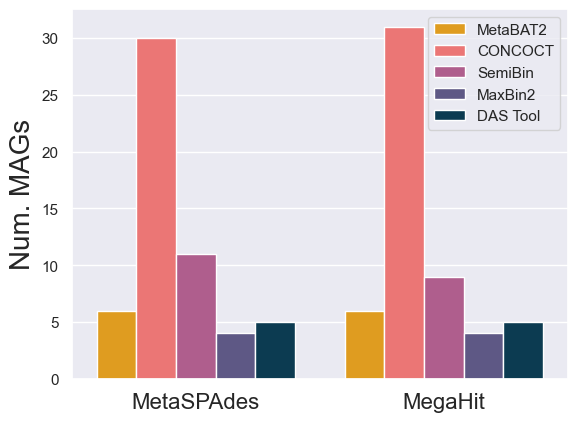

In [7]:
fig = bar_plot(bin_ct_df).get_figure()

In [8]:
# Save a large SVG without padding
fig.savefig(join(out_dir, 'num_mags.svg'), dpi = 1000, bbox_inches = 'tight')

## Numbers of contigs, total size, and average size per sample-binner

In [9]:
def grouped_bar_plot(df, r, a):
    parameter = row_labels[r]
    p = sns.barplot(data = df, x = 'sample_name', y = parameter, hue = 'binner', \
                    palette = binners_colours, ax = a) 
    p.set_xticklabels(samples_labeled, size = 12) # Relabel each of the groups
    p.set(xlabel = None)
    p.set_ylabel(r, size = 16)
    p.get_legend().remove()
    return p

In [10]:
%%capture
# To suppress figure output
# Define plotting region
# Rows:    3. Row 1 graphs the number of contigs per MAG. Row 2 graphs the total MAG size. 
# Row 3 graphs the average contig size per MAG. 
# Columns: 
row_labels = {'Num. Contigs'     : 'num_ctgs', 
              'Tot. MAG Size'    : 'total_size', 
              'Mean Ctg. Size'   : 'mean_bin_size',
              'Stdev. Ctg. Size' : 'stdev_bin_size'}
fig, axs = plt.subplots(len(row_labels), 1, figsize = (18,18)) # in.

In [11]:
for i, r in enumerate(row_labels.keys()):
    grouped_bar_plot(stats_df, r, axs[i])

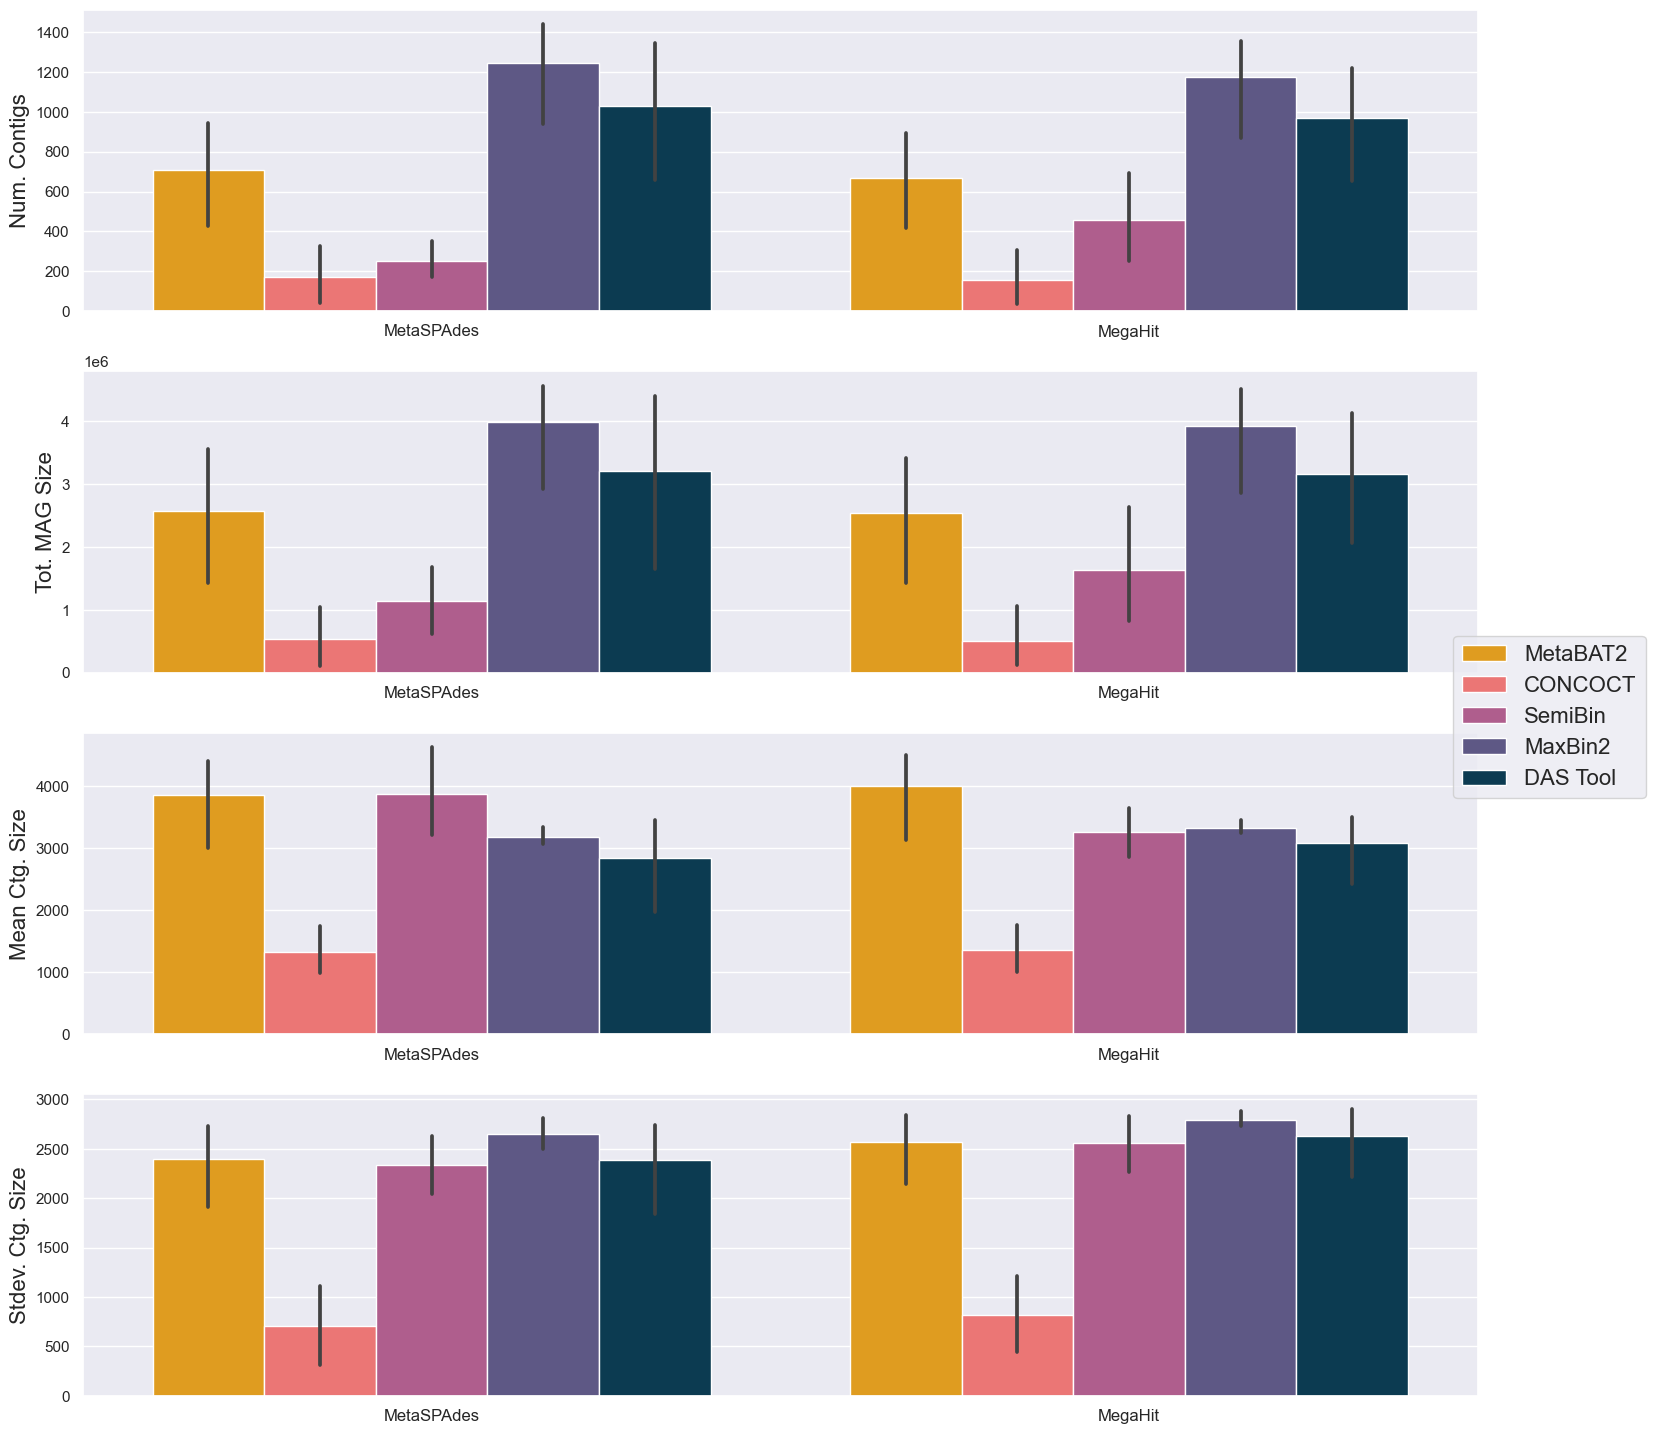

In [12]:
# If applicable, add a global legend and plot the graph
if len(binners_labeled) > 1: # If multiple assemblers are used
    handles, labels = axs[0].get_legend_handles_labels()
    fig.legend(handles, binners_labeled, loc = 'center right', fontsize = 16)
fig

In [13]:
# Save a large SVG without padding
fig.savefig(join(out_dir, 'num_ctgs_bases_avgs.svg'), dpi = 1000, bbox_inches = 'tight')